In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import umap
import seaborn as sns

c:\Users\kaius\.virtualenvs\text-as-data-U3kkjxUG\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

texts = [
  "apple orange pear", "apple pear quince",
  "apple pear orange quince peach avocado kiwi physalis"
]
vec = CountVectorizer()
dfmat = vec.fit_transform(texts)
dist_dfmat = cosine_similarity(dfmat)
dist_dfmat

array([[1.        , 0.66666667, 0.61237244],
       [0.66666667, 1.        , 0.61237244],
       [0.61237244, 0.61237244, 1.        ]])

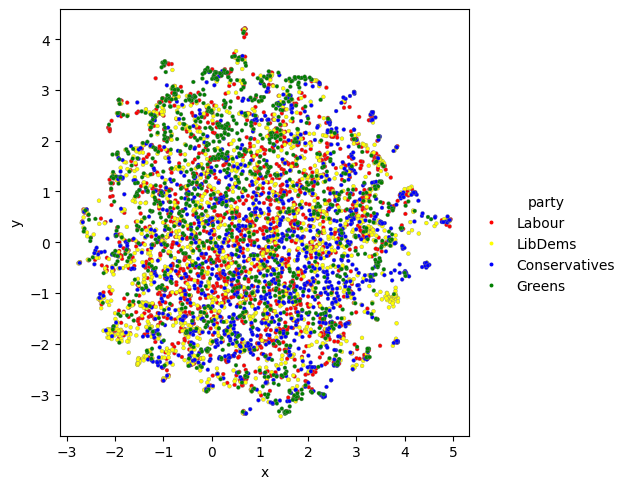

In [11]:

df = pd.read_csv("data/uk_manifestos.csv")
vec = TfidfVectorizer(min_df=5, stop_words="english")
dfmat = vec.fit_transform(df["text"])
cdict = {
    'Labour': 'red',
    'LibDems': 'yellow',
    'Conservatives': 'blue',
    'Greens': 'green'
}
reducer = umap.UMAP()
embeddings = reducer.fit_transform(dfmat)
df["x"] = embeddings[:,0]
df["y"] = embeddings[:,1]
sns.relplot(
  data=df, x="x", y="y", hue="party", edgecolor="grey",
  s=8, palette=cdict, facet_kws={"despine": False}
)

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df is already loaded

# Using CountVectorizer for tokenization and stopwords removal
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['text'])

# Compute cosine similarities
sim_mat = cosine_similarity(dtm)
sim_df = pd.DataFrame(sim_mat)

# Only keep the upper triangle of the matrix
import numpy as np
sim_df = sim_df.where(np.triu(np.ones(sim_df.shape), k=1).astype(bool))

print(sim_df)


      0         1         2         3         4         5         6     \
0      NaN  0.117851  0.166667  0.172133  0.100504  0.239474  0.222222   
1      NaN       NaN  0.088388  0.273861  0.639602  0.127000  0.235702   
2      NaN       NaN       NaN  0.258199  0.075378  0.089803  0.083333   
3      NaN       NaN       NaN       NaN  0.233550  0.231869  0.086066   
4      NaN       NaN       NaN       NaN       NaN  0.270765  0.201008   
...    ...       ...       ...       ...       ...       ...       ...   
5235   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5236   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5237   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5238   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5239   NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          7         8         9     ...      5230      5231      5232  \
0     0.267261  0.104116  0.288675  ..

In [23]:
target_text = 46
print(df['text'].iloc[target_text])


infrastructure and innovation over 10 years.


In [30]:
# Filtering and joining
sim_df = sim_df.set_index(df.index)
result = (
    sim_df[sim_df[0] == target_text]
    .sort_values(by=target_text, ascending=False)
    .head(1)
    .merge(df, left_index=True, right_index=True, how='left')
    ['text']
)

print(result.iloc[0])

IndexError: single positional indexer is out-of-bounds

In [9]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

datasource = ColumnDataSource(df)
color_mapping = CategoricalColorMapper(
    palette=list(cdict.values()),
    factors=list(cdict.keys())
)

plot_figure = figure(
    title='UMAP projection of UK manifestos',
    width=600, height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(
    tooltips="<span>@text</span>"
))

plot_figure.circle(
    'x','y',source=datasource,
    fill_color=dict(field='party', transform=color_mapping),
    line_color="grey",line_alpha=0.6,fill_alpha=0.6,size=4
)
show(plot_figure)

Loading BokehJS ...